In [46]:
# imports

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette('husl')
sns.set(style = "darkgrid")
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from sklearn import metrics


from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from PIL import Image, ImageFilter
import requests
from io import BytesIO
import numpy as np
import random
from keras.utils import to_categorical

ImportError: cannot import name 'to_categorical' from 'keras.utils' (D:\download\anaconda\envs\ml\lib\site-packages\keras\utils\__init__.py)

In [3]:
train = pd.read_csv("sign_mnist_train.csv")


test = pd.read_csv("sign_mnist_test.csv")


In [4]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
train.shape

(27455, 785)

In [6]:
train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [7]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [13]:
# data as numpy arry
train_data = np.array(train, dtype = "float32")
test_data = np.array(test, dtype = "float32")

In [20]:
# datasets as numpy arry

class_names = ["A", "B", "C", "D","E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "p", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", ]

label for image is:  S


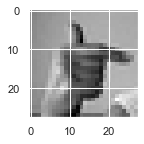

In [38]:
# sanity check  plot a few images and label
i = random.randint(1, train.shape[0])
fig, ax1 = plt.subplots(figsize=(2,2))
plt.imshow(train_data[i,1:].reshape((28,28)), cmap= "gray")
print("label for image is: ", class_names[int(train_data[i,0])])

Text(0.5, 1.0, 'label')

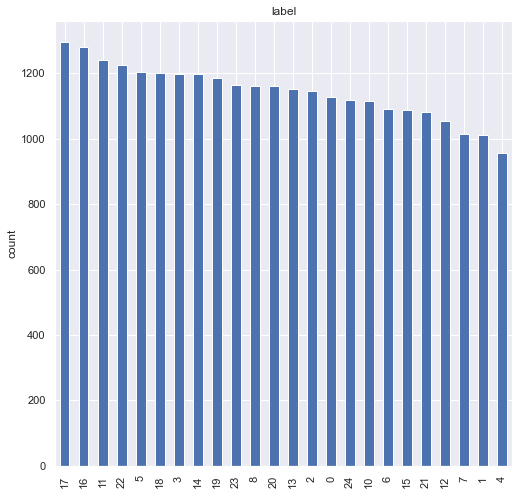

In [44]:
# data distrubtion visualisation

fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
train["label"].value_counts().plot(kind="bar", ax=ax1)
ax1.set_ylabel("count")
ax1.set_title("label")

In [45]:
# normalize( scale X values)
x_train = train_data[:, 1:]/255
x_tst = test_data[:, 1:]/255

In [ ]:
# convert to categorical
y_train = train_data[:, 0]
y_train_cat = to_categorical(y_train, num_classes=25)

y_test = test_data[:, 0]
y_test_cat = to_categorical(y_test, num_classes=25)